# Partitionnement hiérarchique

## Importation des bibliothèques
* make_blobs permet de générer des distributions suivant une loi normale

In [51]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


# 1/ Ici on ne détermine pas le nombre de groupe à l'avance 
# On définie des critères pour de rapprochement

# 2/ Calcule de toutes les distances entre les diff. individu

# 3/ construction d'un arbre qui réuini les individus les plus proches, 
# puis les groupes d'individu les plus proches

## Génération des données :
* Cette fois nous allons générer des données à l'aide de scikit-learn
    * n_samples = nombre de points à générer
    * n_features = nombre de paramètres des points
    * centers = nombre de centres à générer (paramètre de la loi normale)
    * cluster_std = La déviation standard pour les partition (paramètre de la loi normale)

In [52]:
# 200 exemple générer à partir des loi normal avec un centre à 4 
#  cluster_std => un étart standart à la moyen de 1
# n_features => nb d'input / param / colone 

params, obj = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=42)
obj

array([3, 3, 4, 5, 0, 0, 4, 5, 1, 0, 4, 3, 1, 0, 2, 1, 5, 0, 1, 3, 2, 2,
       2, 0, 0, 4, 2, 1, 1, 1, 5, 3, 2, 0, 3, 0, 4, 2, 2, 2, 4, 0, 5, 0,
       4, 5, 3, 2, 1, 2, 0, 4, 2, 5, 3, 1, 3, 3, 0, 4, 1, 2, 5, 5, 3, 4,
       1, 2, 0, 3, 1, 0, 1, 4, 0, 4, 5, 2, 0, 4, 2, 1, 4, 0, 1, 1, 1, 4,
       5, 5, 5, 4, 3, 2, 5, 4, 3, 1, 2, 4, 5, 2, 5, 1, 3, 3, 4, 1, 3, 3,
       3, 5, 3, 0, 0, 5, 5, 4, 2, 5])

## Ajout des bibliothèques pour utiliser le partitionnement hiérarchique
* Dans scipy se trouve un objet pour générer graphiquement les arbres de partitionnement
* Dans sklearn, nous cherchons l'algorithme de partitionnement par agglomération

In [53]:
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

## Arbre de partitionnement avec scipy
* Le diagramme représentant les groupements hiérarchiques s'appelle un dendrogramme
* La fonction linkage de scipy permet de réaliser l'agglomération :
    * method = 'single' : basé sur la distance minimum
    * method = 'complete' : basé sur la distance maximum
    * method = 'average' : basé sur la distance moyenne
    * method = 'centroid' : basé sur la distance entre les centroids (centre de gravité)
    * method = 'ward' : : methode basée sur la minimisation des écarts au carré après la fusion de deux partitions  
* Une fois le partitionnement réalisé, il ne reste plus qu'à afficher le dendogramme


(array([2.29938972, 4.77795936]), array([7.00450931, 1.14393733]))

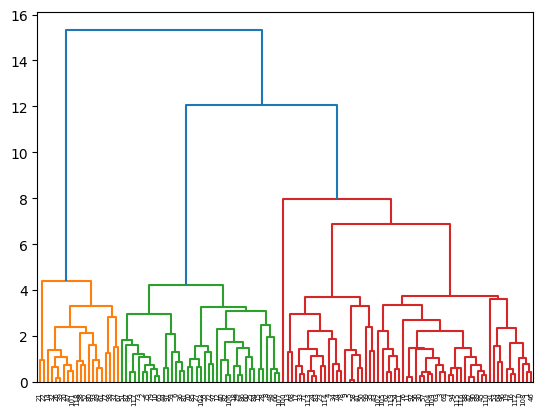

In [54]:
dendrograme = sch.dendrogram(sch.linkage(params, method='average'))
params[2], params[8]

## Représentation graphique des points générés

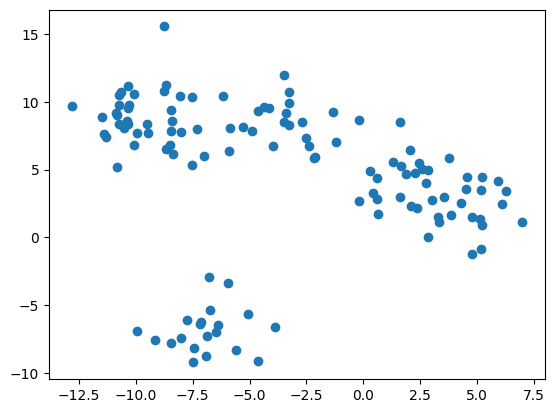

In [55]:
# récupération du tableau de tout les X / Y
plt.scatter(params[:,0], params[:,1])

## Création de l'objet qui va appliquer le partitionnement par agglomération
* n_clusters : Combien de partitions voulons-nous ?
* linkage : Quel mode de calcul des distances utiliser ?
* lancer l'entrainement de la prédiction sur les données

## Représentation graphique de la prédiction
* La prédiction se décompose en 4 partitions
* Nous allons les représenter à l'aide de 4 couleurs différentes

## Représentation graphique de la cible